# Basic imports

In [1]:
import pandas as pd
import numpy as np
import operator
import statistics
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams.update({'figure.max_open_warning': 0})

# Loading dataframe

In [2]:
mixed_df=pd.read_csv("molecules_v1.csv",sep="\t"); mixed_df.head()

,m_name,n_atoms_without_Hydrogen,n_atoms_with_Hydrogen,m_weight,m_avg_weigth,m_weigth_without_Hydrogen,n_radical_electrons,n_valence_electrons,n_aliphatic_carbocycles,n_aliphatic_heterocycles,...,n_Hydrogen_acceptors,n_Hydrogen_donnors,n_briged_head_atoms,n_atoms_stereo_centers,n_atoms_unspecified_stereo_centers,n_spiro_atoms,m_logp,m_mr,fraction_CSP3,is_cns_molecule
0,BUMETANIDE,25,45,364.109293,344.263,364.423,0,134,0,0,...,5,3,0,0,0,0,3.0365,94.6882,0.235294,0
1,BACLOFEN,14,26,213.055656,201.568,213.664,0,76,0,0,...,2,2,0,1,1,0,1.8570,55.5002,0.300000,1
2,METYRAPONE,17,31,226.110613,212.167,226.279,0,86,0,0,...,3,0,0,0,0,0,2.6371,65.8305,0.214286,0
3,METHYLPHENOBARBITAL,18,32,246.100442,232.154,246.266,0,94,0,1,...,3,1,0,1,1,0,1.0426,64.7197,0.307692,1
4,DULOXETINE,21,40,297.118735,278.271,297.423,0,108,0,0,...,3,1,0,1,1,0,4.6309,90.1797,0.222222,1


# Model and metrics import

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import *

In [4]:
data_frame=mixed_df.drop(["m_name"],axis=1)
y=data_frame["is_cns_molecule"]
x=data_frame.drop(["is_cns_molecule"],axis=1)

# Functions

In [5]:
def scores_to_dict(label,scores):
    dct={}
    for lbl,i in zip(label,scores):
        dct[lbl]=i
    return dct

In [6]:
def save_df_to_disk(df,name:str,separator="\t"):
    df.to_csv(name,sep=separator,index = False, header=True)

In [7]:
def get_new_df_with_selected_features(features:list,data_df=x,prediction_df=y,big_df=mixed_df):
    
    def get_indexes(selection=features,df=data_df): 
        index_list=df.columns.get_indexer(selection)
        return index_list
    
    index_list=get_indexes()
    new_df=data_df.iloc[:, index_list]
    new_df.insert(0,"m_name",big_df["m_name"].values)
    new_df=new_df.join(prediction_df)
    
    return new_df

In [8]:
def get_new_df_without_selected_features(weight_zero_features:list,data_df=x,prediction_df=y,big_df=mixed_df):   
    new_df=data_df.drop(weight_zero_features,axis=1)
    new_df.insert(0,"m_name",big_df["m_name"].values)
    new_df=new_df.join(prediction_df)
    
    return new_df

In [9]:
def scores_to_dict(label,scores):
    dct={}
    for lbl,i in zip(label,scores):
        dct[lbl]=i
    return dct

In [10]:
from itertools import chain 

def get_fixed_list(lst: list): 
    
    def remove_duplicates(lst_1d: list):
        unique_lst = []
        for data in lst_1d:
            if data not in unique_lst:
                unique_lst.append(data)
        return unique_lst  
    
    lst_1d=list(chain.from_iterable(lst))
    
    return remove_duplicates(lst_1d)

In [11]:
def get_weigth_zero_features(data,scores):
    weight_zero_features=[]
    for label,i in zip(data.columns,scores):
        if i==0: weight_zero_features.append(label)
            
    return weight_zero_features

In [12]:
def get_weigths_n_iterations(x,y,n,best_k=10):        
    lst=[]
    for i in range(n):
        scores=selector_scores_v1(data=x,historical_class=y,selected_k=best_k)
        weight_zero_features=get_weigth_zero_features(x,scores)
        lst.append(weight_zero_features)
        
    return get_fixed_list(lst)

# Score v1

In [13]:
def selector_scores_v1(selection_type=mutual_info_classif,selected_k=10,columns_length=len(x.columns),
                    data=x,historical_class=y):
    
    def get_scores(selector,columns_length):      
        scores = selector.scores_
        plt.figure(figsize=(12,8),dpi=80)
        plt.plot(scores)
        plt.xticks(np.arange(columns_length),[x for x in range(columns_length)]);
        
        return scores
    
    selector = SelectKBest(selection_type, k=selected_k)
    selector.fit(data,historical_class)
    results=get_scores(selector,columns_length)
    
    return results

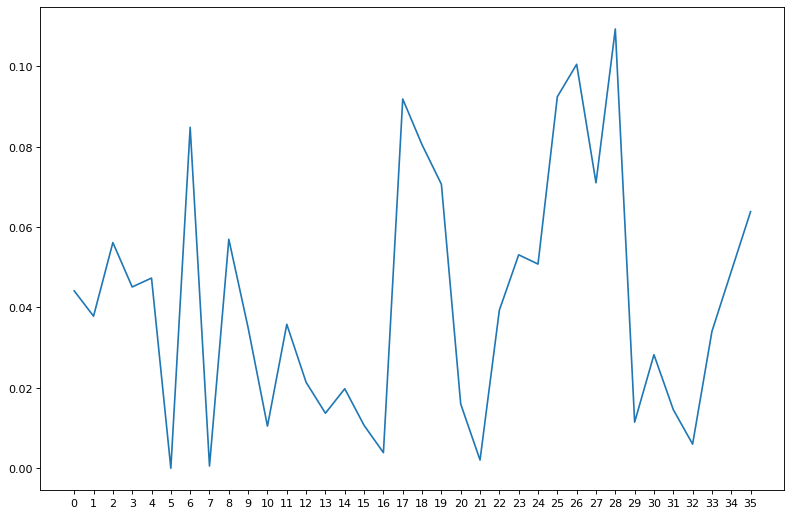

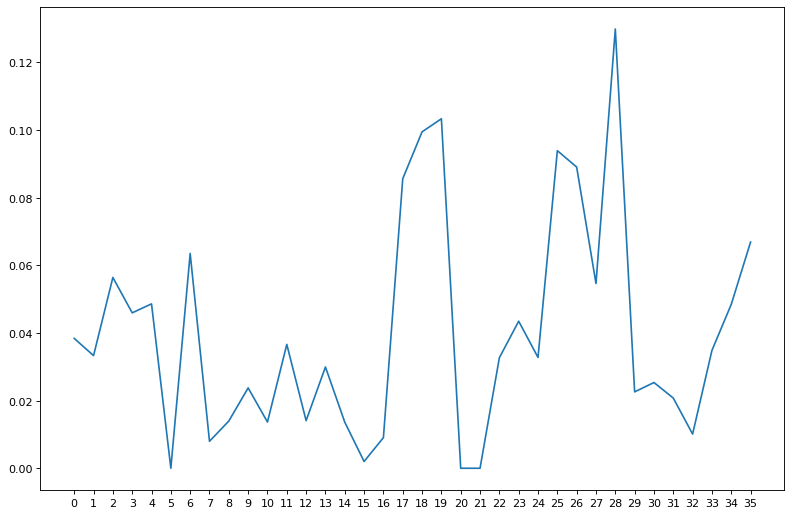

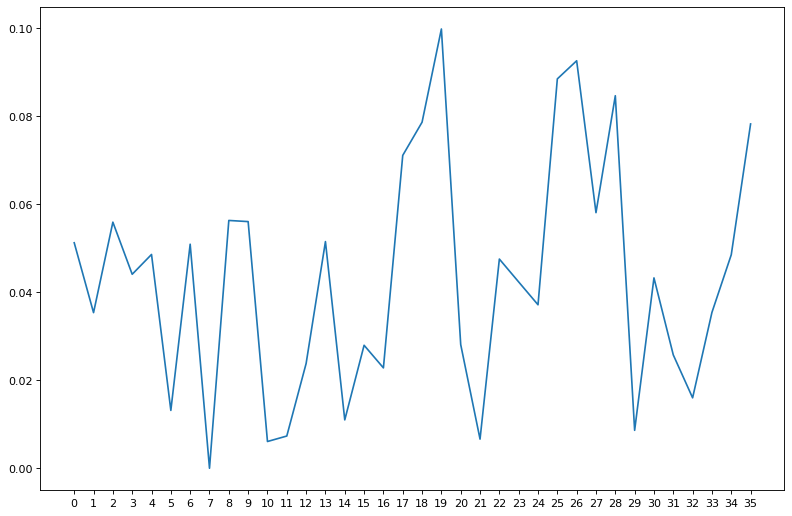

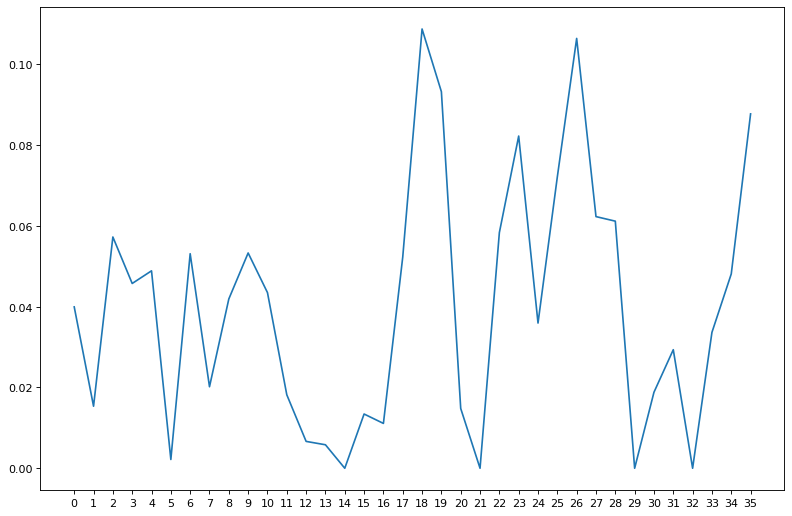

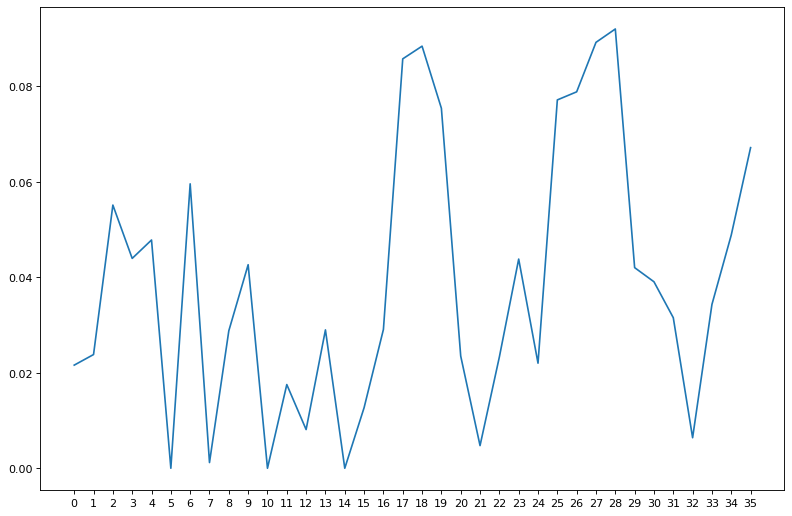

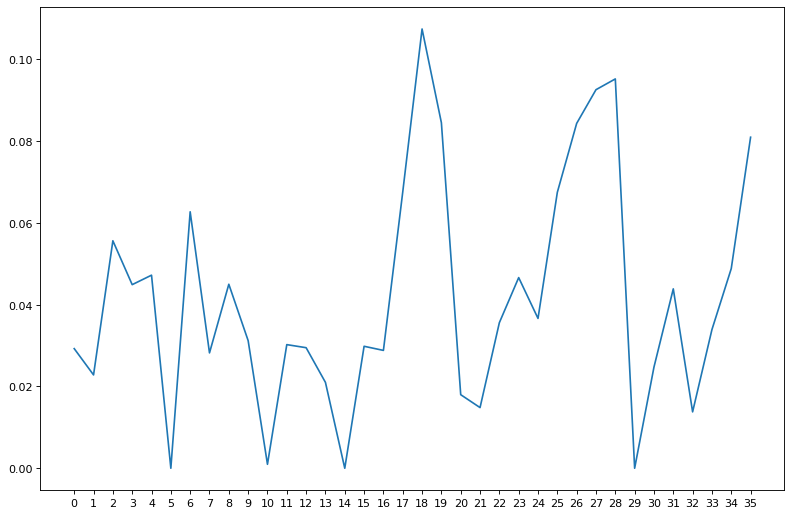

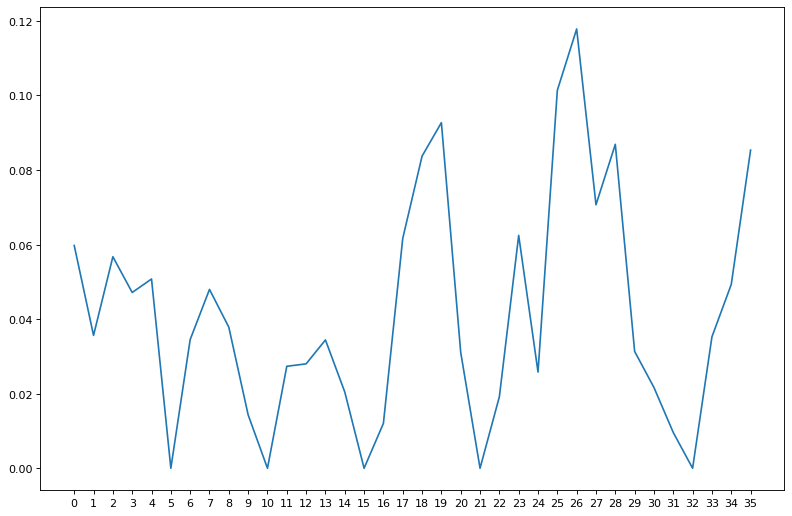

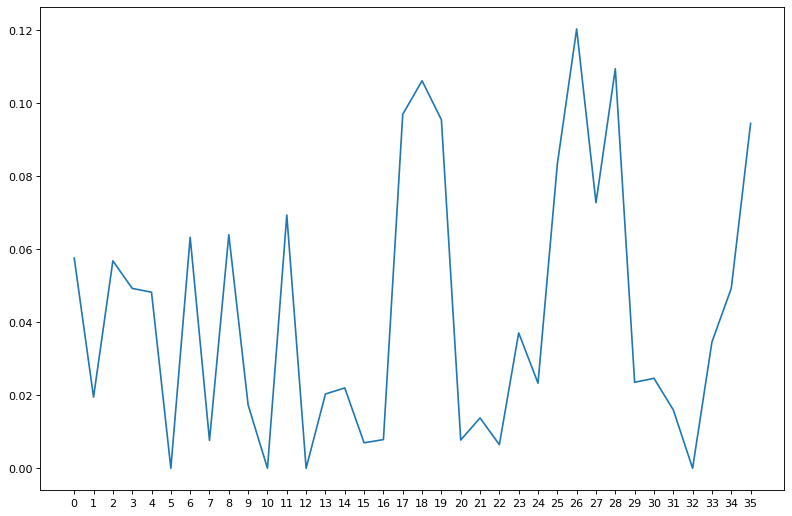

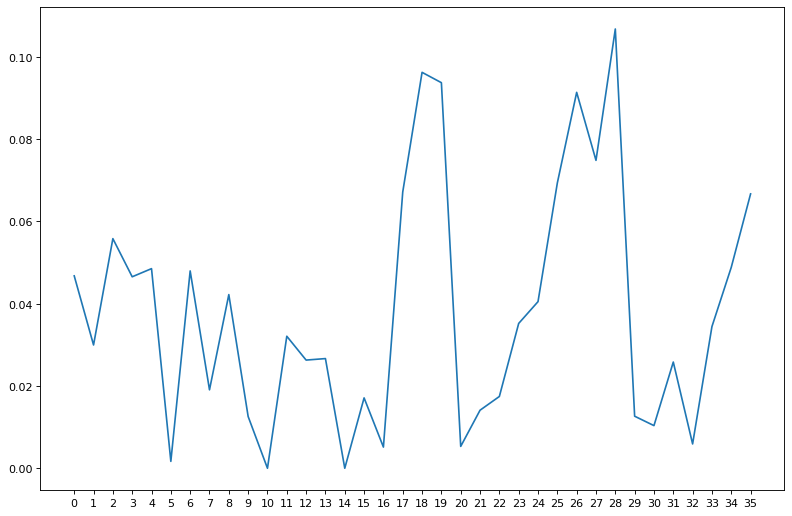

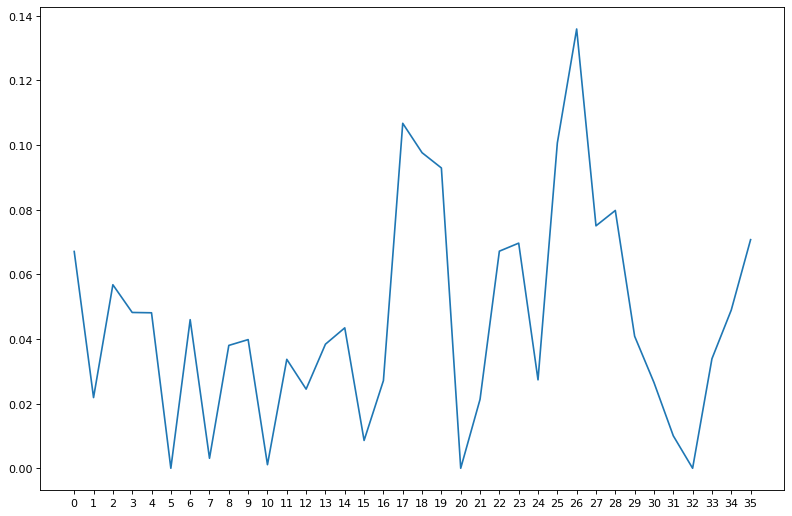

In [14]:
weight_zero_features=get_weigths_n_iterations(x,y,10)

# Getting rid of weigth 0 features

In [15]:
weight_zero_features

['n_radical_electrons',
 'n_hetero_cycles',
 'n_rings',
 'n_aliphatic_carbocycles',
 'n_saturated_carbocycles',
 'n_briged_head_atoms',
 'n_spiro_atoms',
 'n_amide_bonds',
 'n_saturated_heterocycles',
 'n_aromatic_heterocycles']

['n_radical_electrons',
 'n_aliphatic_carbocycles',
 'n_amide_bonds',
 'n_spiro_atoms',
 'n_aromatic_heterocycles',
 'n_hetero_cycles',
 'n_rings',
 'n_briged_head_atoms',
 'n_saturated_rings',
 'n_atoms_stereo_centers']

In [16]:
non_zero_features_df=get_new_df_without_selected_features(weight_zero_features); non_zero_features_df.head()

,m_name,n_atoms_without_Hydrogen,n_atoms_with_Hydrogen,m_weight,m_avg_weigth,m_weigth_without_Hydrogen,n_valence_electrons,n_aliphatic_heterocycles,n_aliphatic_rings,n_aromatic_carbocycles,...,n_HOH,n_O,n_Hydrogen_acceptors,n_Hydrogen_donnors,n_atoms_stereo_centers,n_atoms_unspecified_stereo_centers,m_logp,m_mr,fraction_CSP3,is_cns_molecule
0,BUMETANIDE,25,45,364.109293,344.263,364.423,134,0,0,2,...,4,7,5,3,0,0,3.0365,94.6882,0.235294,0
1,BACLOFEN,14,26,213.055656,201.568,213.664,76,0,0,1,...,3,3,2,2,1,1,1.8570,55.5002,0.300000,1
2,METYRAPONE,17,31,226.110613,212.167,226.279,86,0,0,0,...,0,3,3,0,0,0,2.6371,65.8305,0.214286,0
3,METHYLPHENOBARBITAL,18,32,246.100442,232.154,246.266,94,1,1,1,...,1,5,3,1,1,1,1.0426,64.7197,0.307692,1
4,DULOXETINE,21,40,297.118735,278.271,297.423,108,0,0,2,...,1,2,3,1,1,1,4.6309,90.1797,0.222222,1


In [17]:
save_df_to_disk(non_zero_features_df,"mic_non_zero_molecules.csv")

# Selector v2

In [18]:
def selector_scores_v2(selection_type=mutual_info_classif,selected_k=10,columns_length=len(x.columns),
                    data=x,historical_class=y):
    
    def get_scores(selector,columns_length):      
        scores = selector.scores_
        plt.figure(figsize=(12,8),dpi=80)
        plt.plot(scores)
        plt.xticks(np.arange(columns_length),[x for x in range(columns_length)]);
        
        return scores
    
    selector = SelectKBest(selection_type, k=selected_k)
    selector.fit_transform(data,historical_class)  
    result=get_scores(selector,columns_length)
    
    return result,selector

In [19]:
def get_scores_and_df_n_times(x,y,n,best_k=10):        
    lst=[]
    for i in range(n):
        scores,selector=selector_scores_v2(data=x,historical_class=y,selected_k=best_k)
        cols = selector.get_support(indices=True)
        new_df = x.iloc[:,cols]
        lst.append([scores,new_df])
        
    return lst

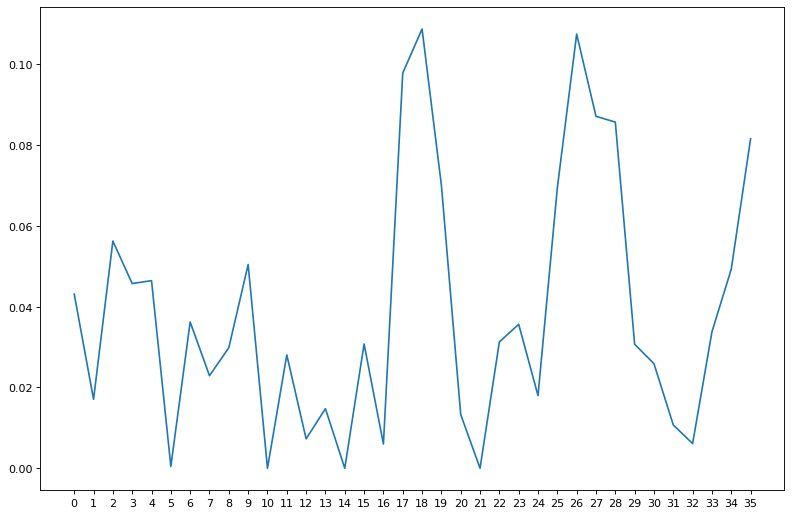

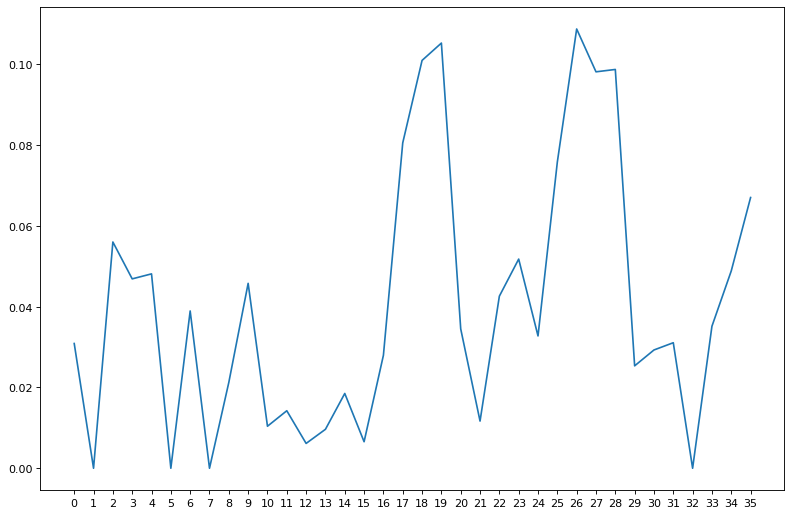

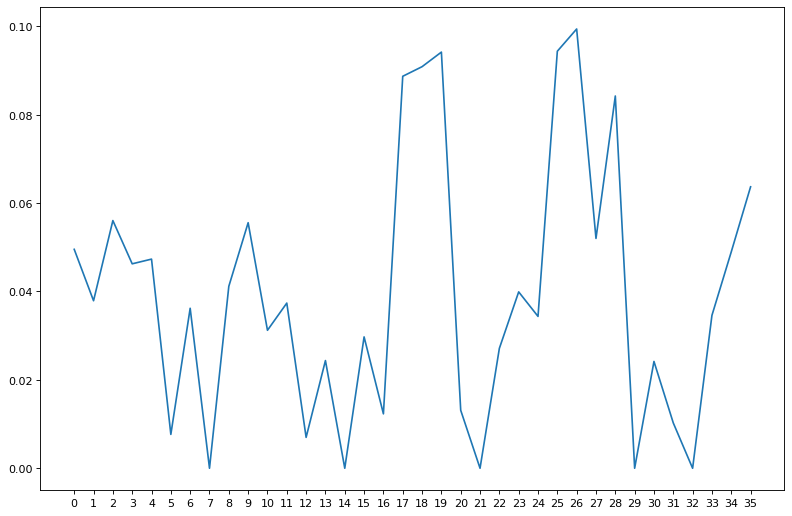

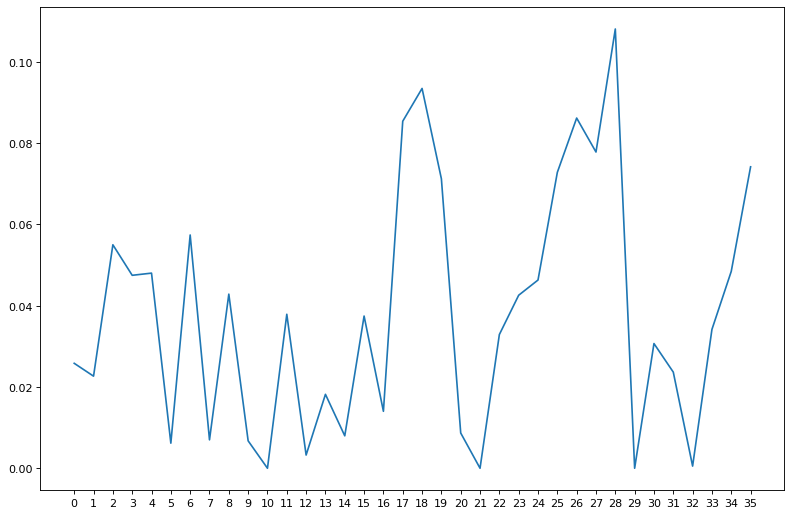

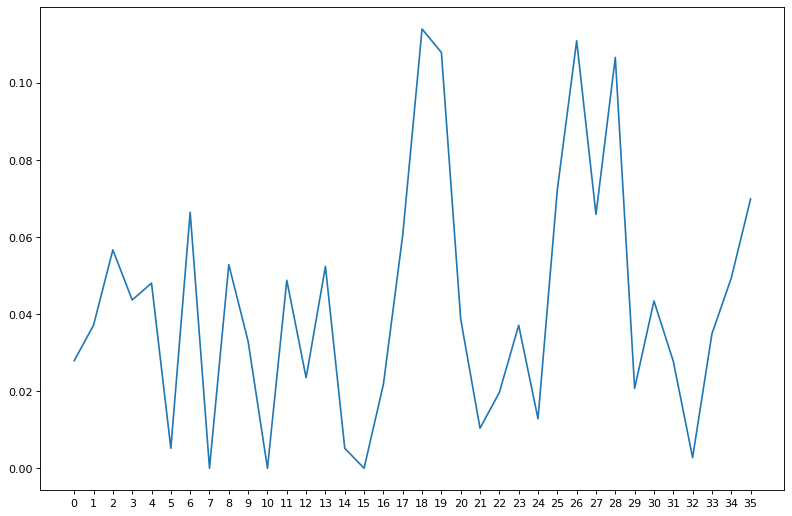

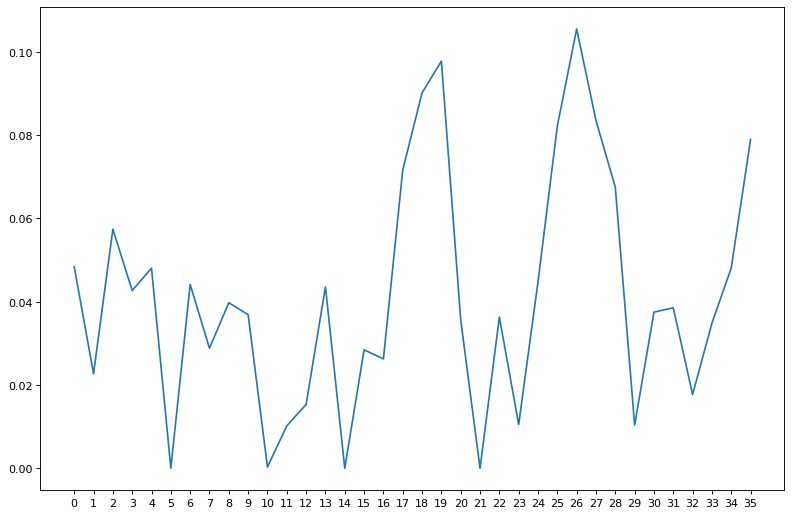

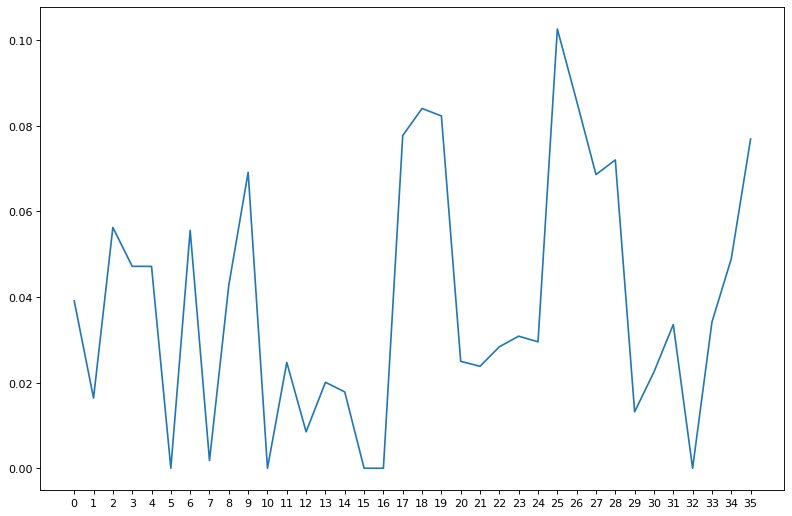

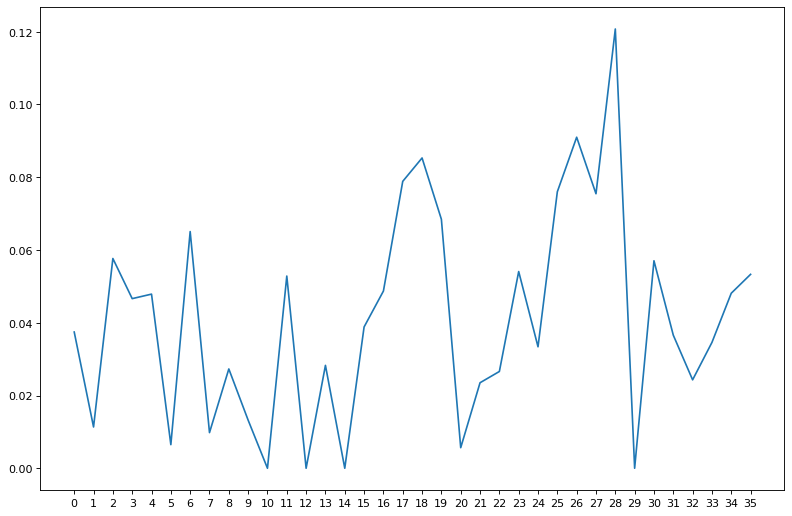

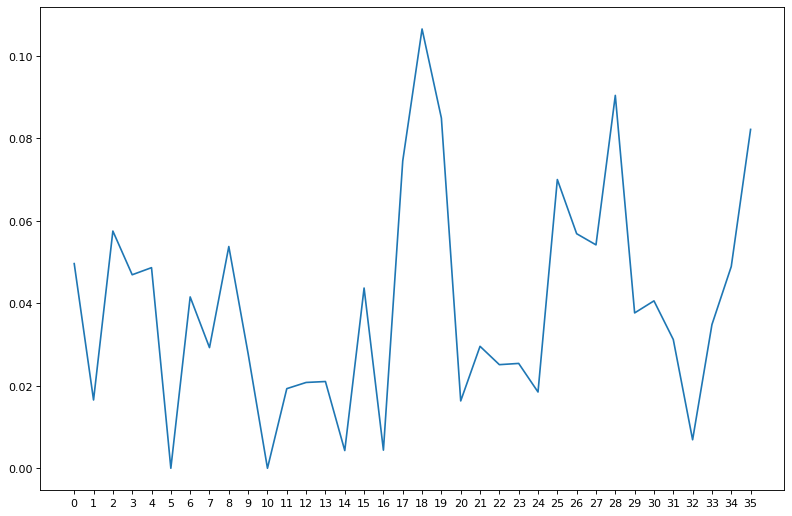

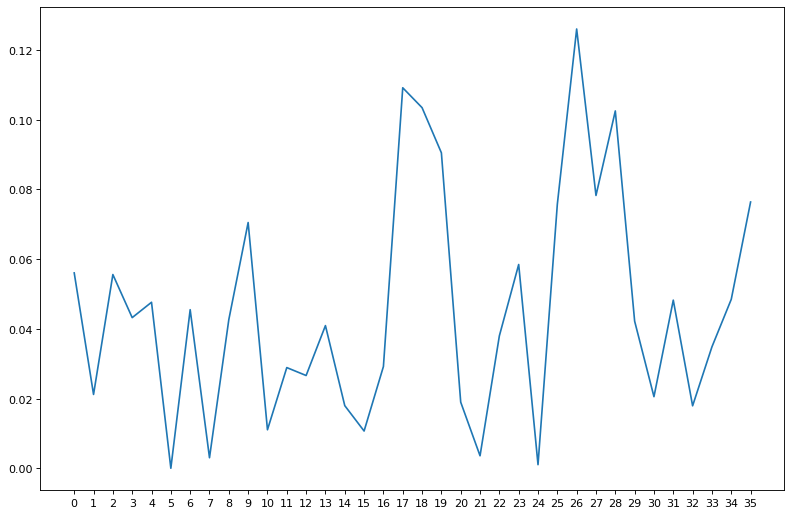

In [20]:
mic_k10=get_scores_and_df_n_times(x,y,10,best_k=10)

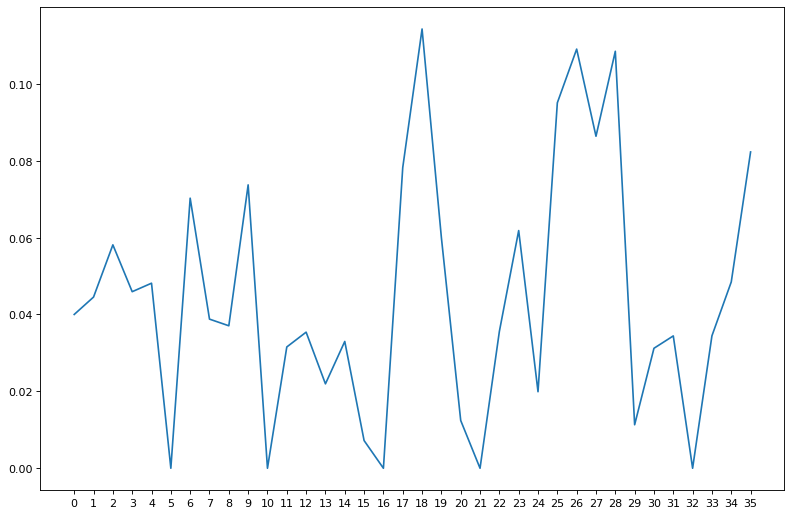

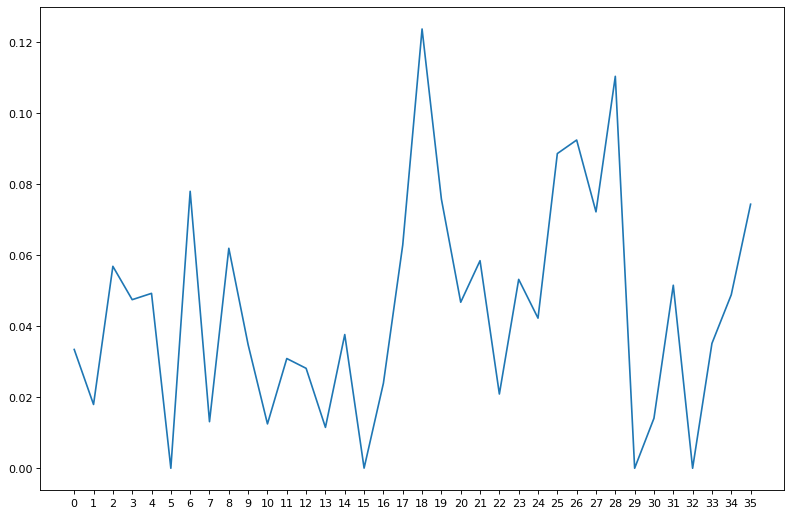

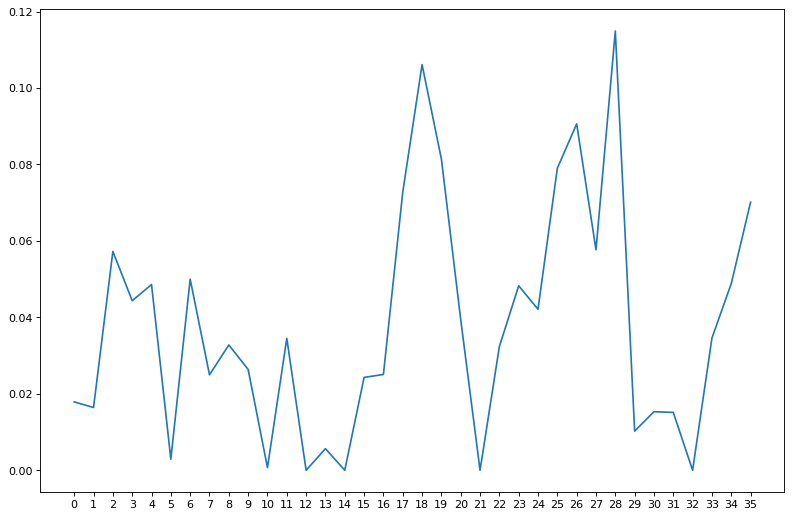

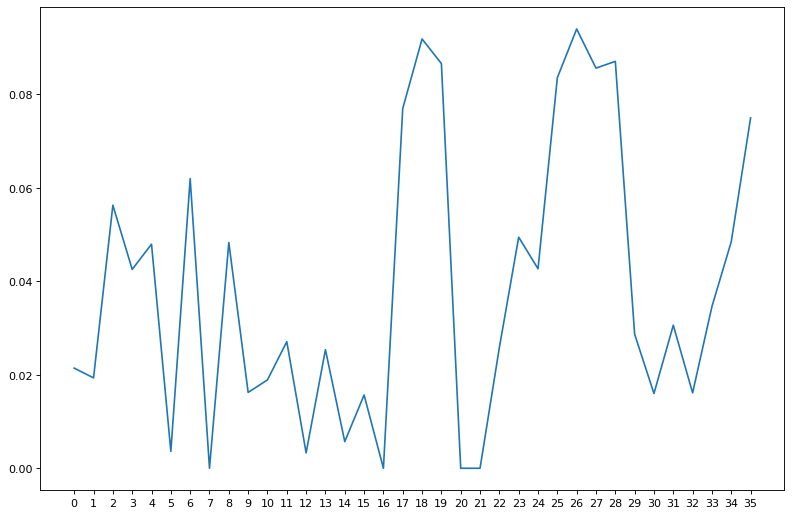

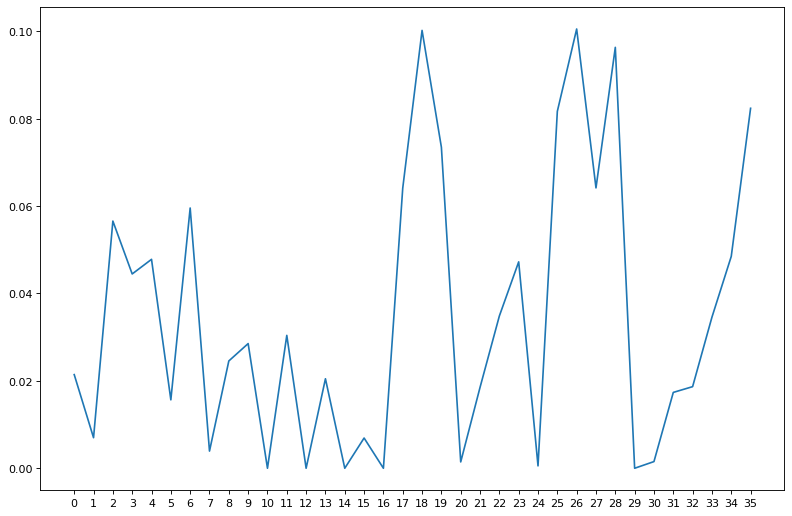

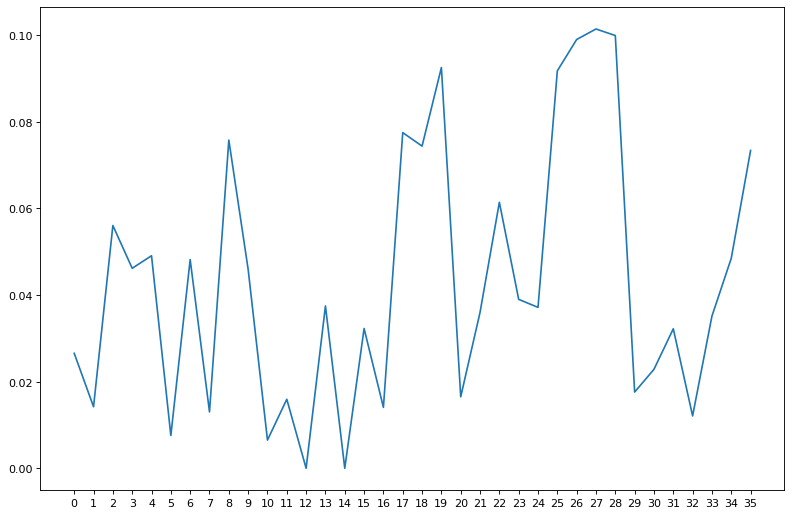

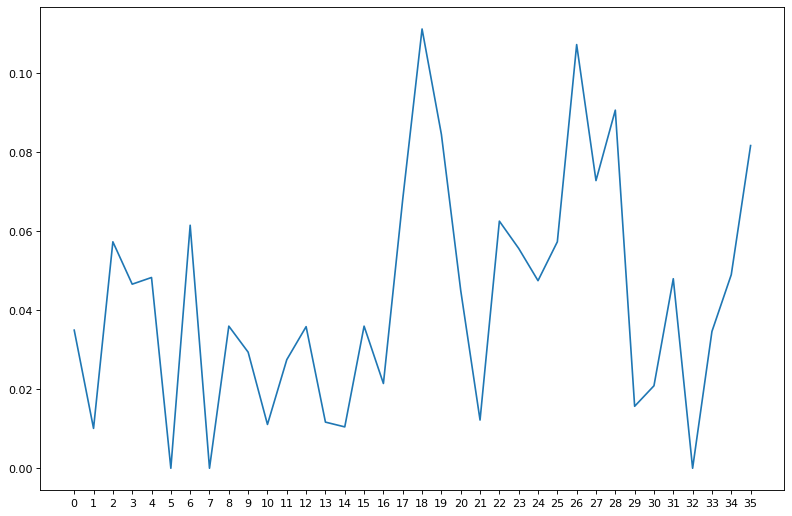

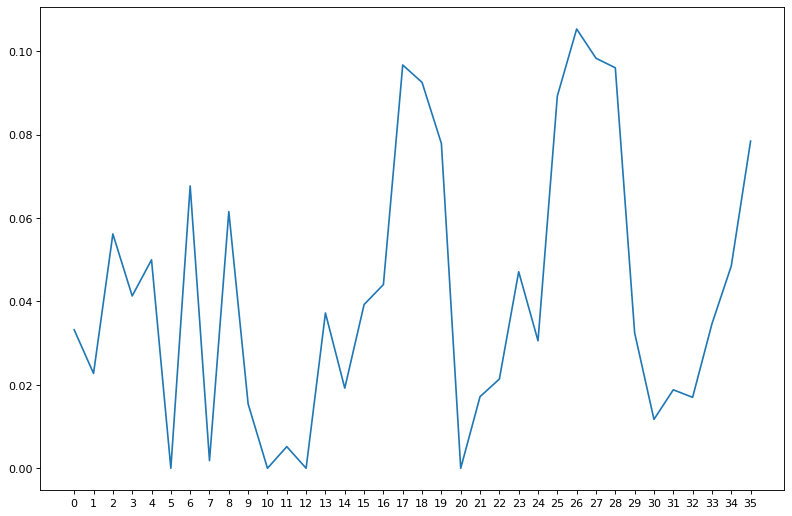

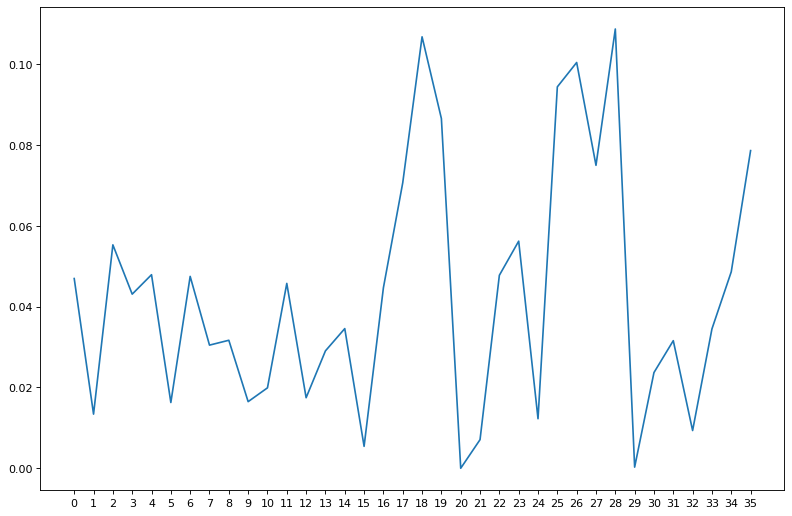

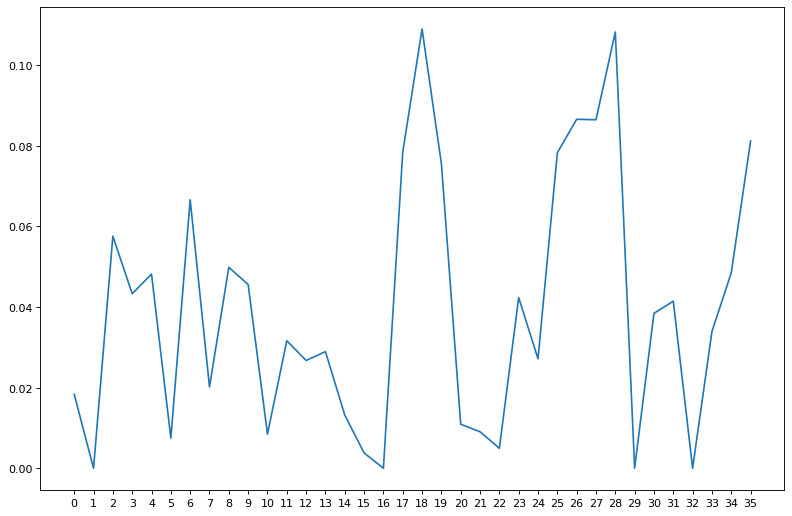

In [21]:
mic_k15=get_scores_and_df_n_times(x,y,10,best_k=15)

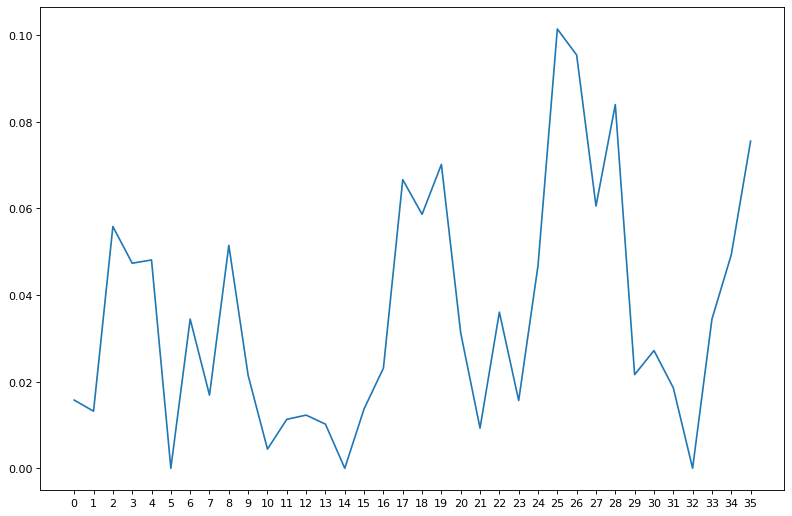

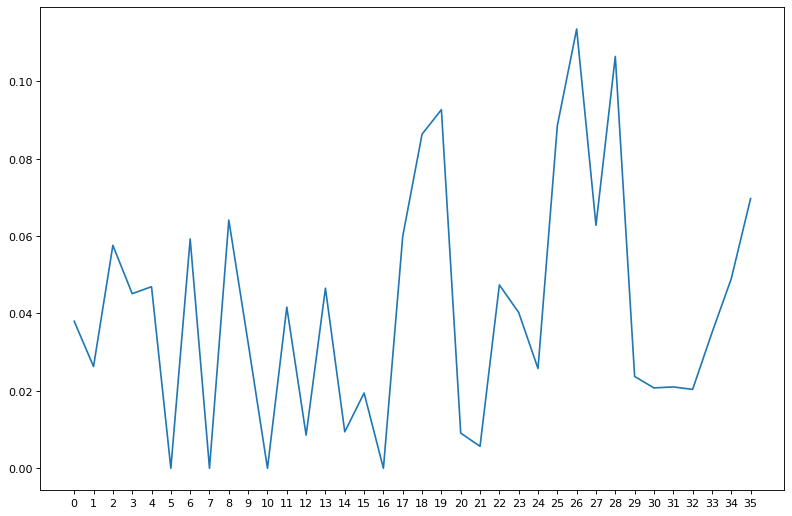

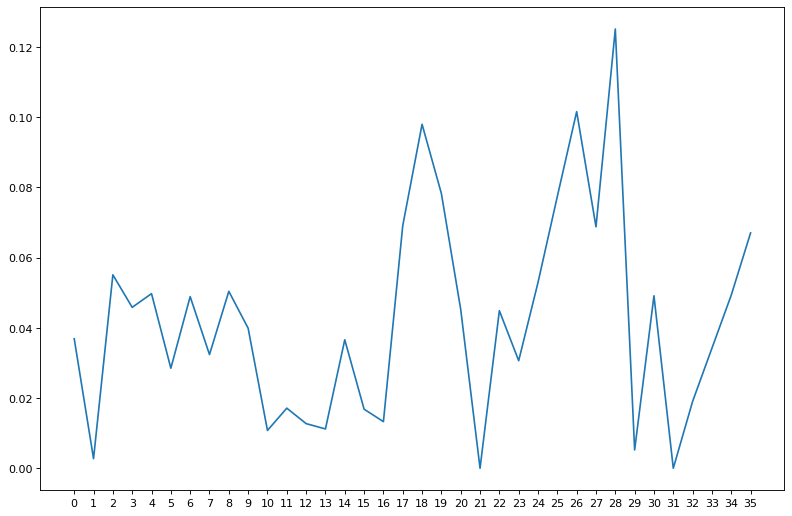

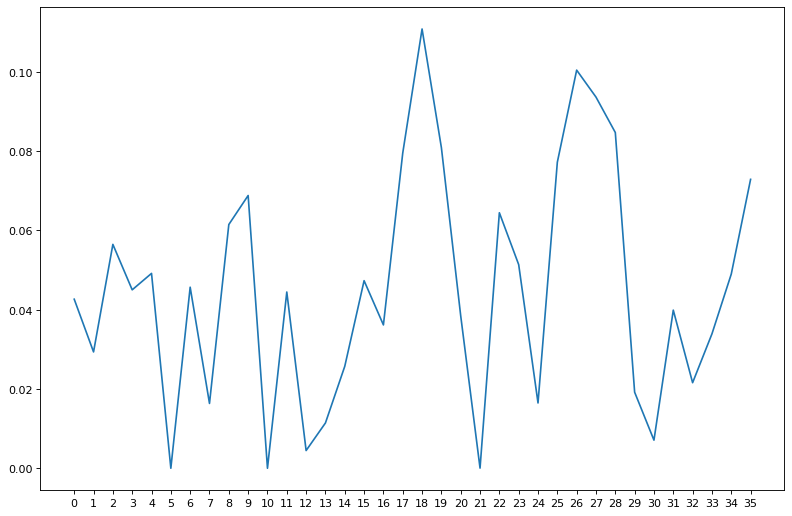

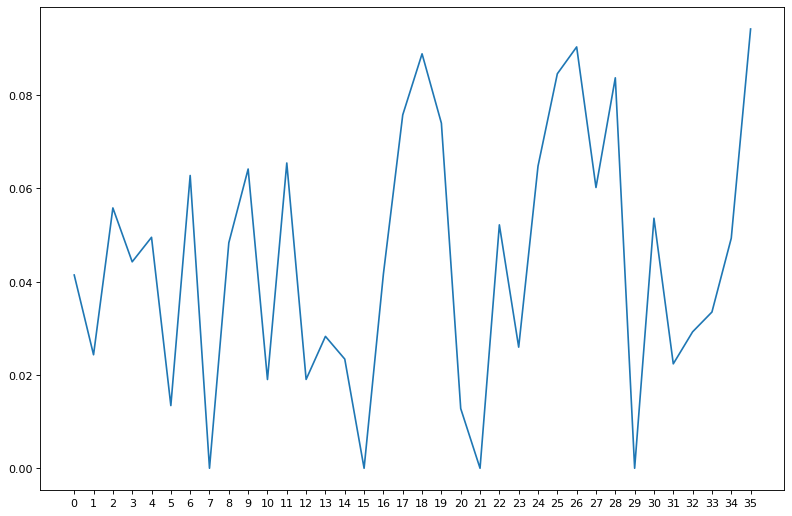

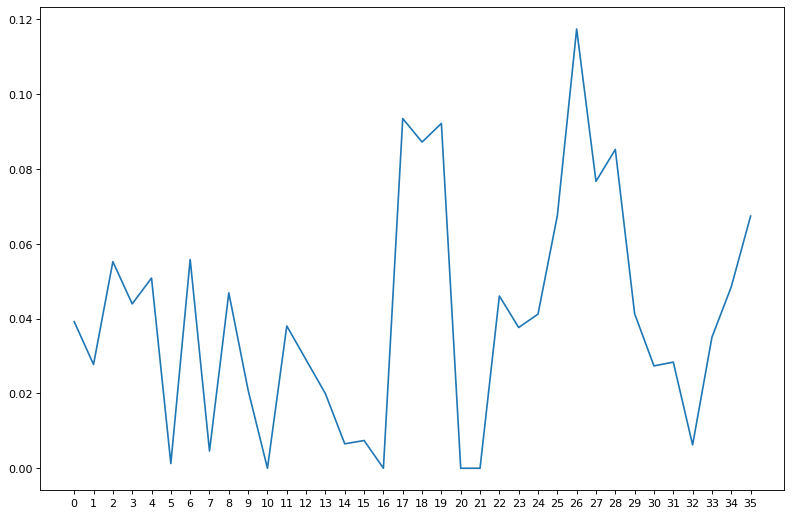

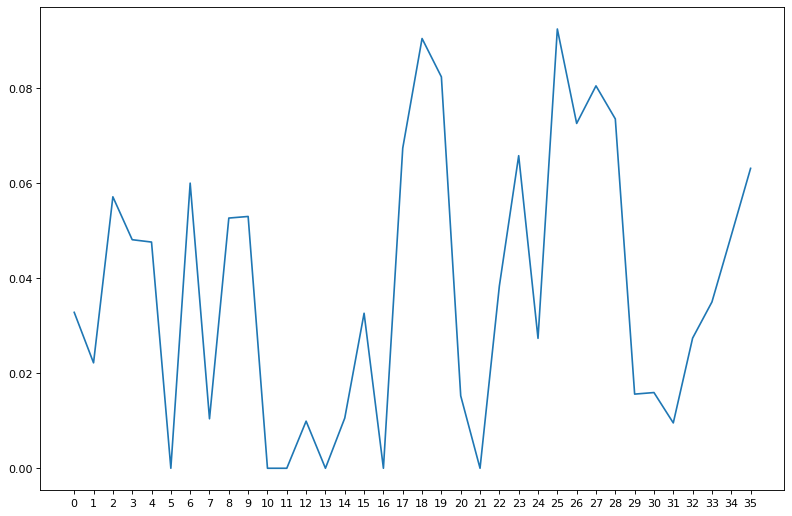

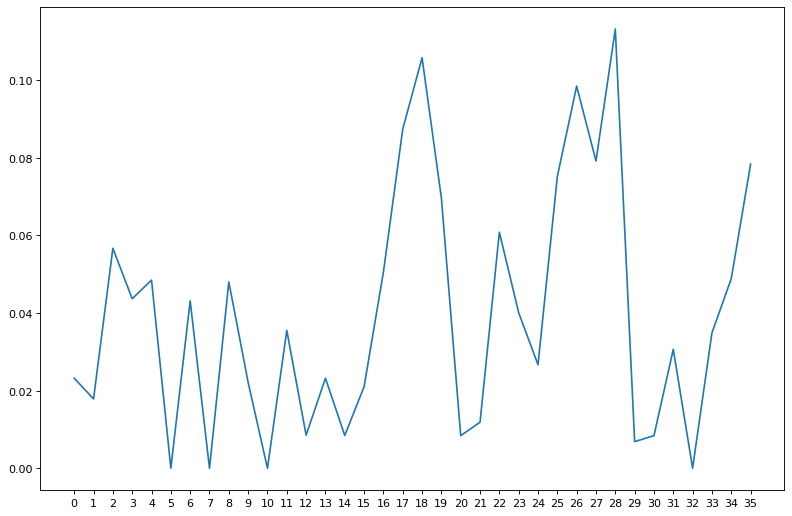

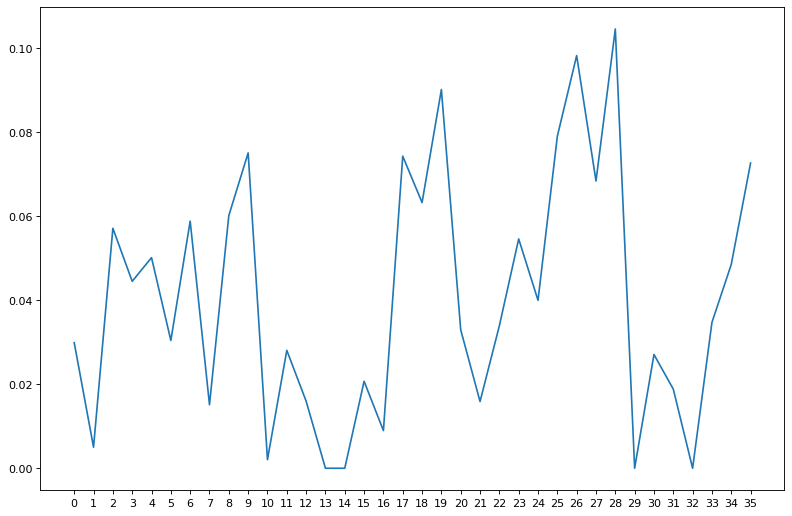

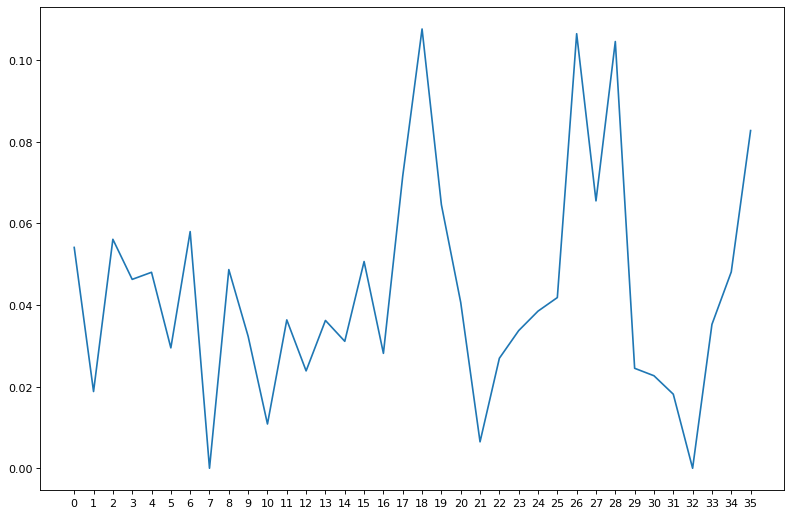

In [22]:
mic_k20=get_scores_and_df_n_times(x,y,10,best_k=20)

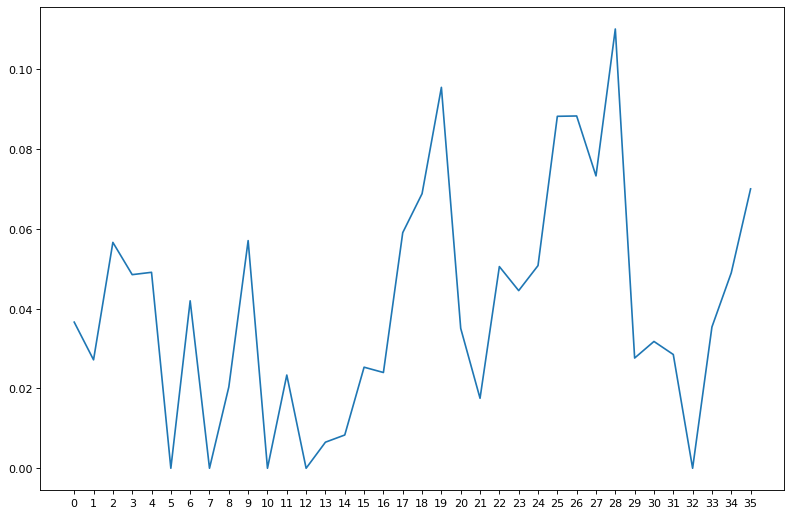

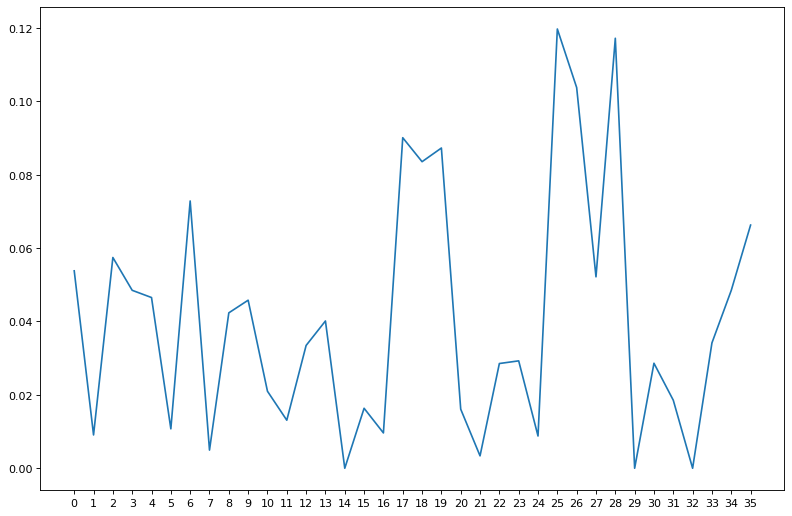

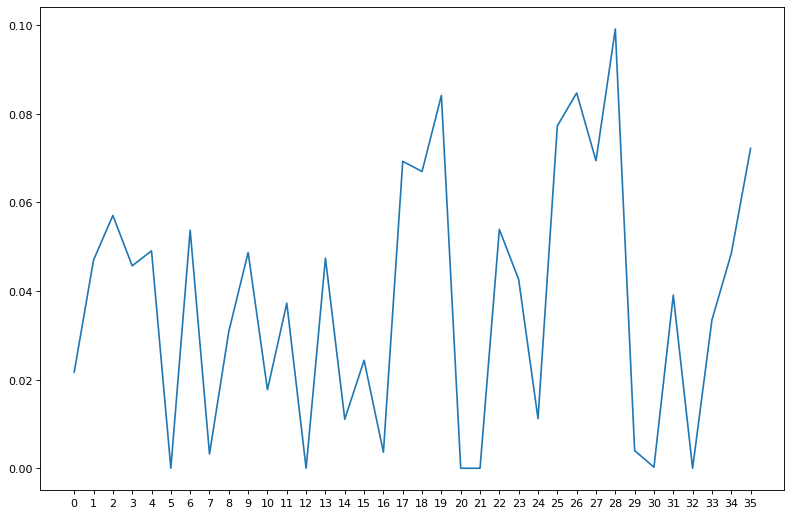

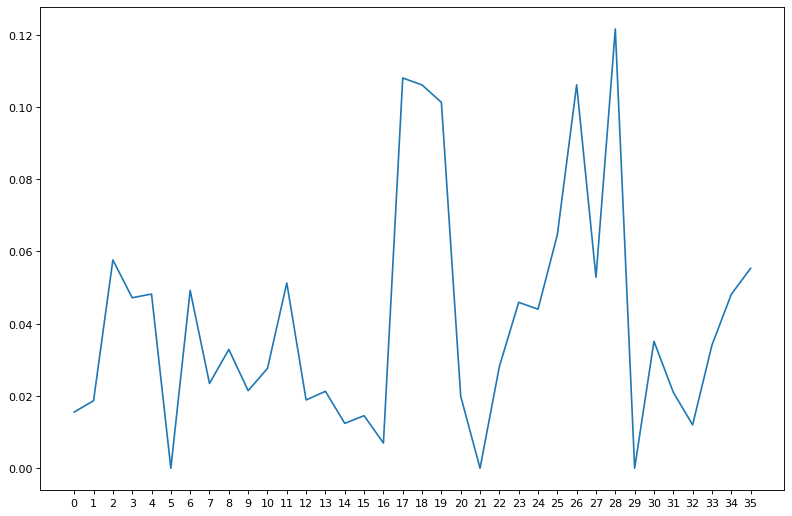

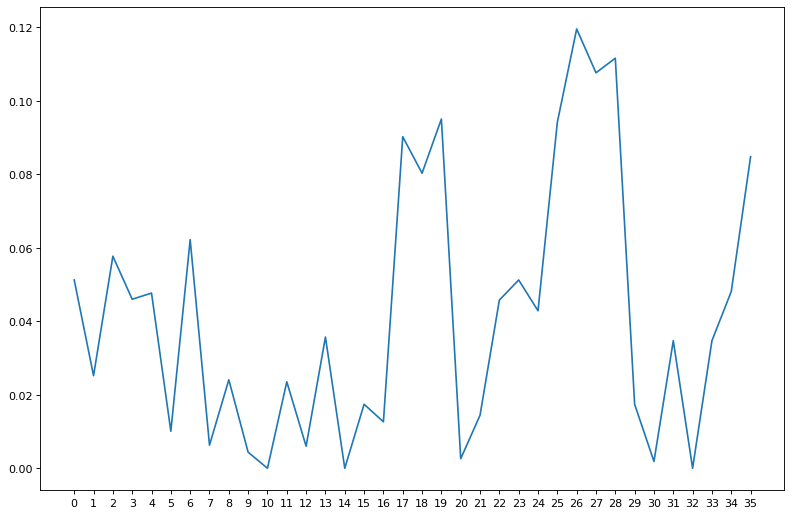

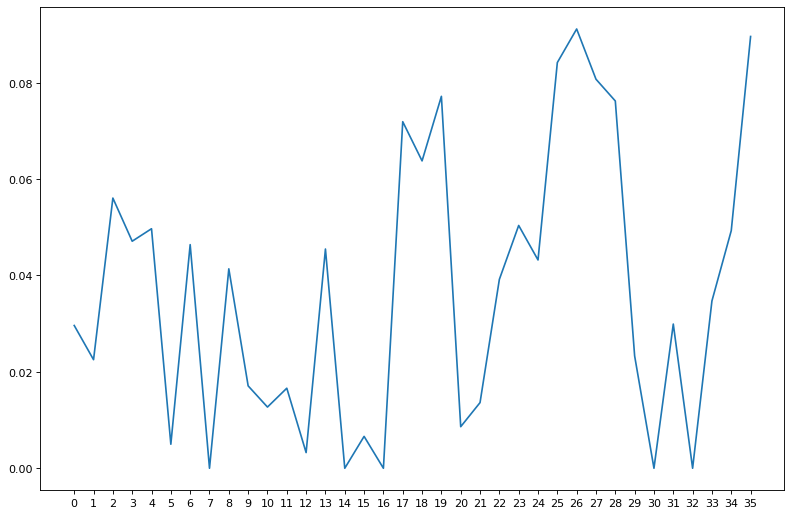

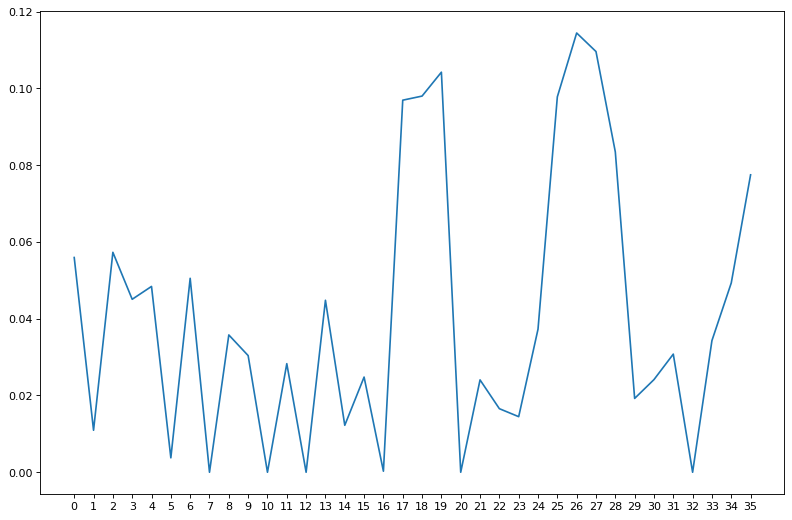

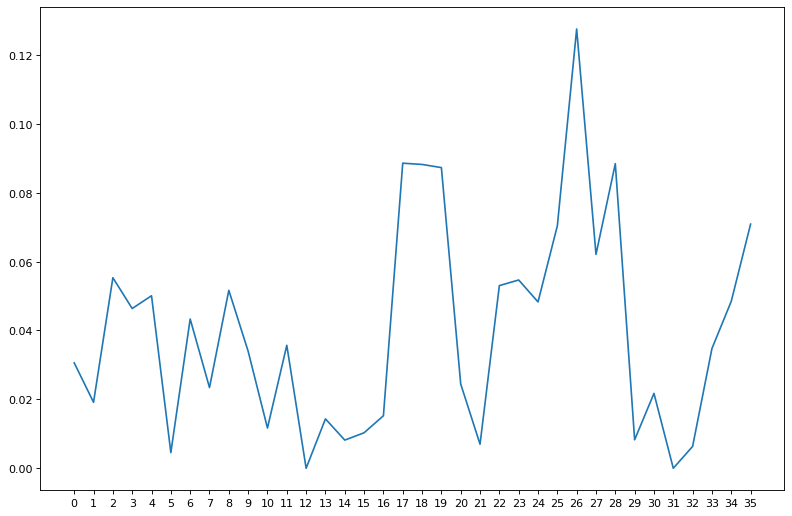

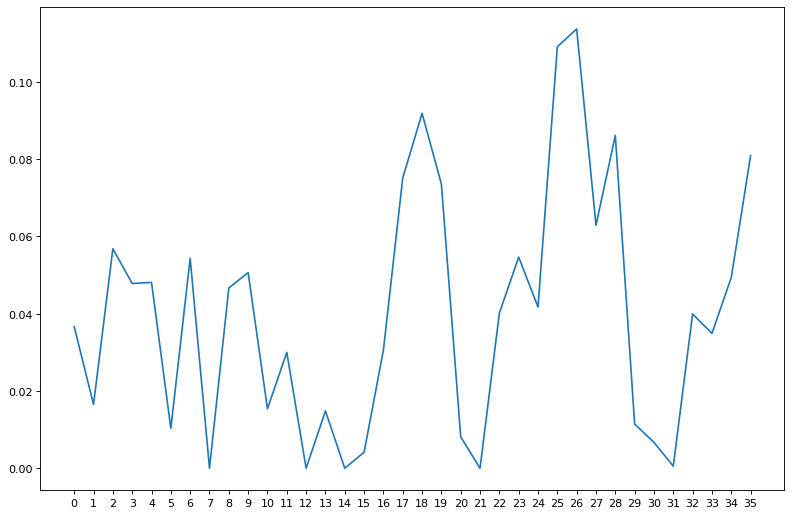

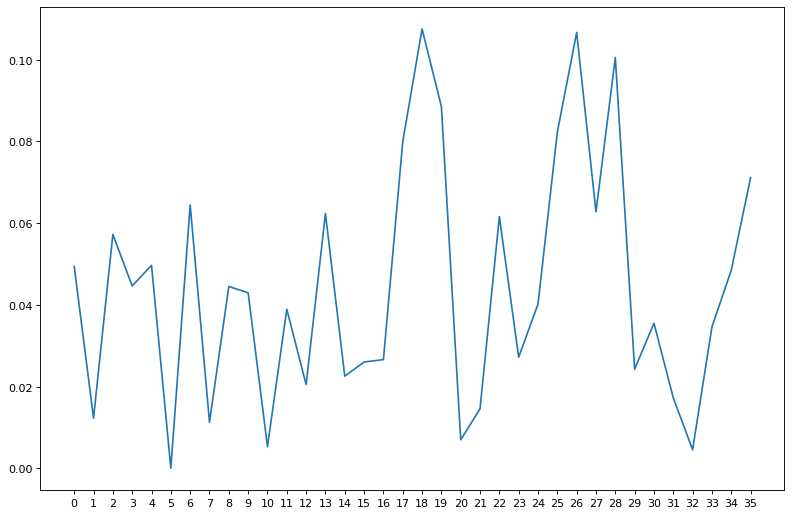

In [23]:
mic_k25=get_scores_and_df_n_times(x,y,10,best_k=25)

# Select best model from get_scores_and_df_n_times

In [24]:
# code not avaliable :D